In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv(r'downloads\Customers.csv')
products = pd.read_csv(r'downloads\Products.csv')
transactions = pd.read_csv(r'downloads\Transactions.csv')


In [41]:
# 1. Data Inspection
print(customers.info())
print(products.info())
print(transactions.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2024-08-25 12:38:23 to 2024-04-21 10:52:24
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
-

In [28]:
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())



CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [29]:
# 2. Basic Statistical Summary
print(customers.describe())
print(products.describe())
print(transactions.describe())


       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


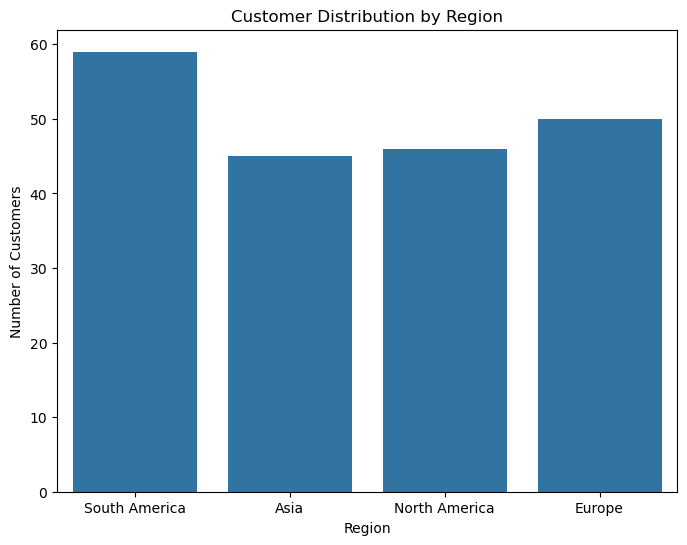

In [30]:

# 3. Customer Distribution by Region
plt.figure(figsize=(8, 6))
sns.countplot(data=customers, x='Region')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

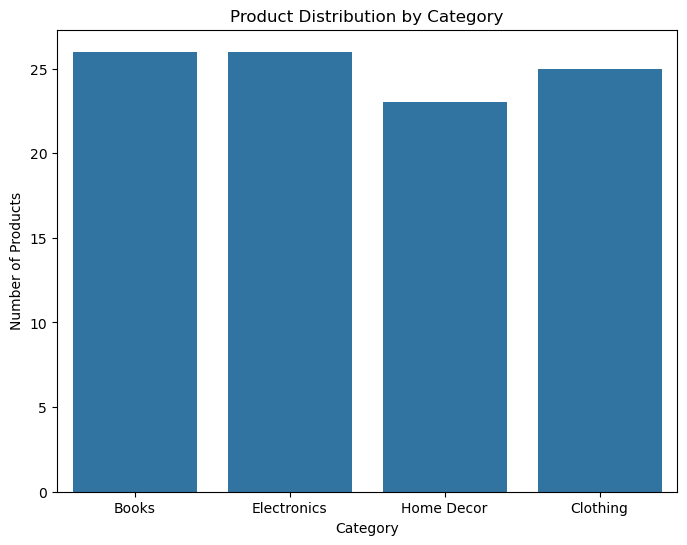

In [44]:
# 4. Product Category Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=products, x='Category')
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

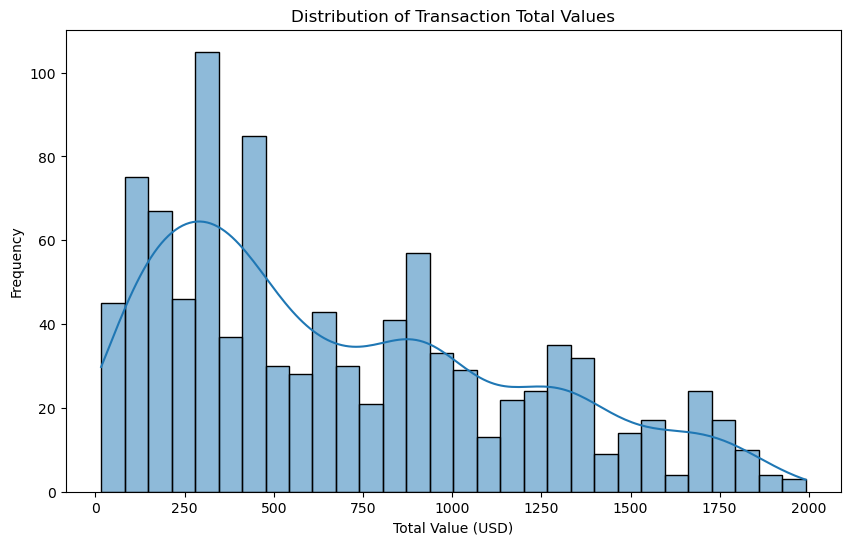

In [45]:
# 5. Distribution of Transaction Total Values
plt.figure(figsize=(10, 6))
sns.histplot(transactions['TotalValue'], kde=True, bins=30)
plt.title('Distribution of Transaction Total Values')
plt.xlabel('Total Value (USD)')
plt.ylabel('Frequency')
plt.show()




In [50]:
# 6. Deriving Insights
# Insight 1: Customer distribution by region
region_counts = customers['Region'].value_counts()
print("\nCustomer distribution by region:")
print(region_counts)



Customer distribution by region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


In [47]:
# Insight 2: Most popular products (based on number of transactions)
product_popularity = transactions['ProductID'].value_counts()
print("\nMost popular products (based on transaction count):")
print(product_popularity.head(10))



Most popular products (based on transaction count):
ProductID
P059    19
P029    17
P062    16
P079    16
P054    16
P061    16
P048    15
P022    15
P096    15
P049    15
Name: count, dtype: int64


In [48]:
# Insight 3: Product category distribution
category_counts = products['Category'].value_counts()
print("\nProduct category distribution:")
print(category_counts)


Product category distribution:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


In [49]:

# Insight 4: Total value of transactions distribution
total_value_distribution = transactions['TotalValue'].describe()
print("\nDistribution of total transaction values:")
print(total_value_distribution)


Distribution of total transaction values:
count    1000.000000
mean      689.995560
std       493.144478
min        16.080000
25%       295.295000
50%       588.880000
75%      1011.660000
max      1991.040000
Name: TotalValue, dtype: float64


In [51]:
# Insight 5: Average transaction value per customer
avg_transaction_value_per_customer = transactions.groupby('CustomerID')['TotalValue'].mean()
print("\nAverage transaction value per customer:")
print(avg_transaction_value_per_customer.describe())


Average transaction value per customer:
count     199.000000
mean      687.580182
std       237.936649
min        82.360000
25%       542.941667
50%       677.207500
75%       828.624167
max      1323.133333
Name: TotalValue, dtype: float64
